In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Other Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,training_total_meetings,training_price,discount_training,satisfaction_level,training_session,number_of_participant,training_field,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,5,...,17,6000000.0,50,5,17,20,Other Series,Customer Service Excellence For Basic and Fron...,Health and Safety Environment,Customer Service Excellence For Basic and Fron...
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,5,...,17,6000000.0,50,5,17,19,Other Series,Customer Service Excellence For Basic and Fron...,Health and Safety Environment,Customer Service Excellence For Basic and Fron...
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,5,...,14,4800000.0,60,5,17,18,Other Series,Customer Service Excellence For Basic and Fron...,Health and Safety Environment,Customer Service Excellence For Basic and Fron...
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,5,...,17,6000000.0,50,5,17,18,Other Series,Customer Service Excellence For Basic and Fron...,Information Security Awareness,Customer Service Excellence For Basic and Fron...
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,17,6000000.0,50,5,17,18,Other Series,Customer Service Excellence For Basic and Fron...,Health and Safety Environment,Customer Service Excellence For Basic and Fron...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   5000 non-null   int64  
 1   company_ID                                   5000 non-null   object 
 2   company_name                                 5000 non-null   object 
 3   company_pic                                  5000 non-null   object 
 4   company_address                              5000 non-null   object 
 5   company_phone                                5000 non-null   object 
 6   company_email                                5000 non-null   object 
 7   company_field                                5000 non-null   object 
 8   transaction_date                             5000 non-null   object 
 9   level_training_process                       5000 non-null   int64  
 10  

In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")


In [5]:
# Preprocessing untuk fitur kategori
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

# Preprocessing untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

numeric_features = ["level_training_process", "total_payment", "satisfaction_level",
                    "frequency_engagement", "brand_sustainability", "interest_in_discount_program",
                    "training_session", "discount_training", "number_of_participant"]

categorical_features = ["group"]

df.info()
drop_features = ["Unnamed: 0", "company_ID", "company_name", "company_pic", "company_address", "company_phone", "company_email", "company_field",
                 "transaction_date", "purchasing_time_patterns", "rating_training", "complaints",
                 "training_ID", "training_field","possibility_of_purchasing_the_same_training", "training_name",
                 "trainer_name", "communication_channel", "tren_mode_factor", "cross_selling", "communication_quality"]

# Gabungkan transformer dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('drop', 'drop', drop_features)
    ],
    remainder="passthrough"
    )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   Unnamed: 0                                   5000 non-null   int64   
 1   company_ID                                   5000 non-null   category
 2   company_name                                 5000 non-null   category
 3   company_pic                                  5000 non-null   category
 4   company_address                              5000 non-null   category
 5   company_phone                                5000 non-null   category
 6   company_email                                5000 non-null   category
 7   company_field                                5000 non-null   category
 8   transaction_date                             5000 non-null   category
 9   level_training_process                       5000 non-null   in

In [6]:
X = df.drop("upselling", axis=1)
y = df["upselling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

pkl = joblib.load(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\modelling\classification\upselling\model_save\model8.pkl")
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("models", pkl)
])
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 253
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 14
[LightGBM] [Info] Start training from score -2.114033
[LightGBM] [Info] Start training from score -2.085460
[LightGBM] [Info] Start training from score -2.085460
[LightGBM] [Info] Start training from score -2.087474
[LightGBM] [Info] Start training from score -2.061602
[LightGBM] [Info] Start training from score -2.026849
[LightGBM] [Info] Start training from score -2.083450
[LightGBM] [Info] Start training from score -2.093540


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['level_training_process',
                                                   'total_payment',
                                                   'satisfaction_level',
                                                   'frequency_engagement',
                                                   'brand_sustainability',
                                                   'interest_in_discount_program',
                                                   'training_session',
                                                   'discount_training',
                                                   'num...
                                                   'transaction_date',
                                                   'purchasing_time_patterns',
                                                   'rating_training',
                                                   'complaints', 'training_ID',
                                                   'training_field',
                                                   'possibility_of_purchasing_the_same_training',
                                                   'training_name',
                                                   'trainer_name',
                                                   'communication_channel',
                                                   'tren_mode_factor',
                                                   'cross_selling',
                                                   'communication_quality'])])),
                ('models',
                 LGBMClassifier(learning_rate=0.01, max_depth=5,
                                n_estimators=50, num_leaves=15))])

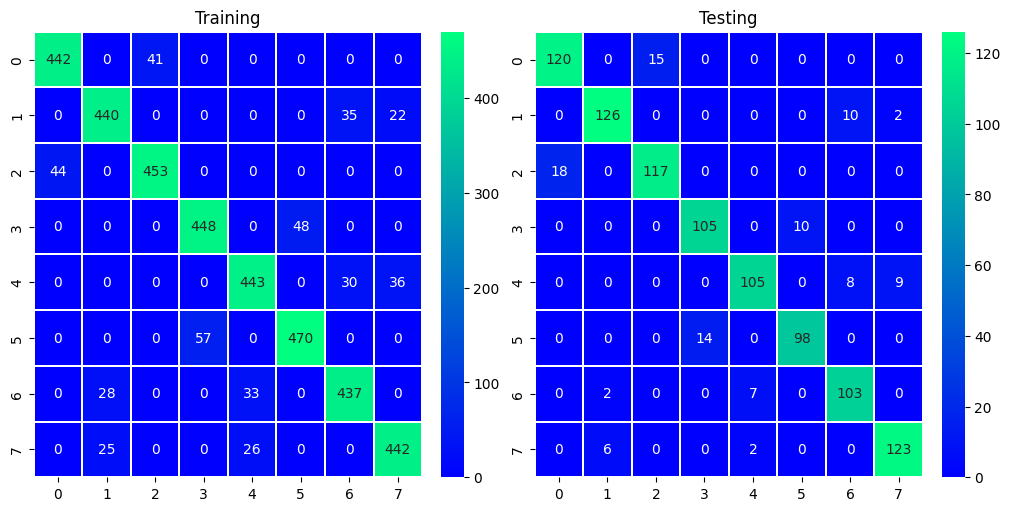

In [7]:
y_pred = model.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize=(10, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, model.predict(X_train)), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")
plt.show()


In [8]:
print(classification_report(y_test, y_pred))

                                                      precision    recall  f1-score   support

Customer Service Excellence For Basic and Frontliner       0.87      0.89      0.88       135
                         Digital Customer Experience       0.94      0.91      0.93       138
                       Health and Safety Environment       0.89      0.87      0.88       135
                                 ICT Risk Management       0.88      0.91      0.90       115
                      Information Security Awareness       0.92      0.86      0.89       122
                               Persiapan Pra Pensiun       0.91      0.88      0.89       112
                      Production Control With Kanban       0.85      0.92      0.88       112
                       Training Green Belt Six Sigma       0.92      0.94      0.93       131

                                            accuracy                           0.90      1000
                                           macro avg      

In [9]:
a = model.predict_proba(X_test.iloc[:1, :])
b = ["Customer Service Excellence For Basic and Frontliner", "Digital Customer Experience", 
     "Health and Safety Environment", "ICT Risk Management", "Information Security Awareness",
     "Persiapan Pra Pensiun", "Production Control With Kanban", "Training Green Belt Six Sigma"
     ]

for i, j in zip(b, a.ravel()):
    print(i, f"{j*100:.2f}%")

Customer Service Excellence For Basic and Frontliner 6.58%
Digital Customer Experience 6.76%
Health and Safety Environment 6.76%
ICT Risk Management 6.75%
Information Security Awareness 11.47%
Persiapan Pra Pensiun 7.15%
Production Control With Kanban 6.77%
Training Green Belt Six Sigma 47.76%


In [10]:
model.predict(X_test.iloc[:1, :])

array(['Training Green Belt Six Sigma'], dtype=object)

In [11]:
y_test.iloc[0]

'Training Green Belt Six Sigma'

In [12]:
X_test.iloc[:1, :]

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,trainer_name,training_total_meetings,training_price,discount_training,satisfaction_level,training_session,number_of_participant,training_field,training_name,cross_selling
1501,1501,P1502,UD Napitupulu (Persero) Tbk,Kadir Sitompul,"Gg. Otto Iskandardinata No. 14\nSalatiga, DKI ...",+62 (0993) 413-3583,purwantitugiman@example.org,Aktivitas Kesehatan Manusia Dan Aktivitas Sosial,2024-02-10,4,...,Ibun,17,5360000.0,33,5,14,13,Other Series,Information Security Awareness,Customer Service Excellence For Basic and Fron...


In [13]:
joblib.dump(model, "./pipeline_save/pipeline8.joblib")

['./pipeline_save/pipeline8.joblib']